In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

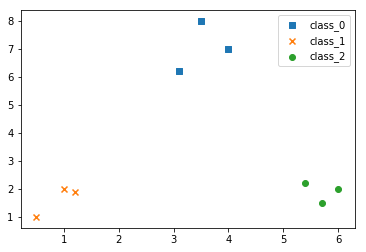

In [2]:
# 首先准备数据集
# 特征向量
X =np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2],
             [1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]]) # 自定义的数据集
# 标记
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2]) #　三个类别

# 按照类别将数据点画到散点图中
class_0=np.array([feature for (feature,label) in zip(X,y) if label==0])
# print(class_0) # 确保没有问题
class_1=np.array([feature for (feature,label) in zip(X,y) if label==1])
# print(class_1)
class_2=np.array([feature for (feature,label) in zip(X,y) if label==2])
# print(class_2)

# 绘图
plt.figure()
plt.scatter(class_0[:,0],class_0[:,1],marker='s',label='class_0')
plt.scatter(class_1[:,0],class_1[:,1],marker='x',label='class_1')
plt.scatter(class_2[:,0],class_2[:,1],marker='o',label='class_2')
plt.legend()

In [3]:
# 构建逻辑回归分类器
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=37) # 先用默认的参数
classifier.fit(X, y) # 对国际回归分类器进行训练

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=37, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
# 将分类器绘制到图中
def plot_classifier(classifier, X, y):
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0 # 计算图中坐标的范围
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0
    step_size = 0.01 # 设置step size
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    # 构建网格数据
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    mesh_output = mesh_output.reshape(x_values.shape) 
    plt.figure()
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)
    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))

    plt.show()

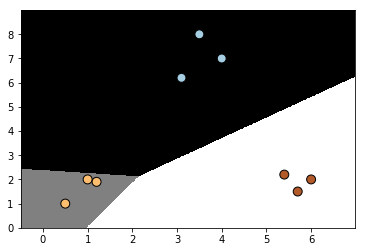

In [5]:
plot_classifier(classifier, X, y)

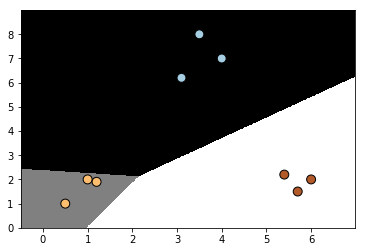

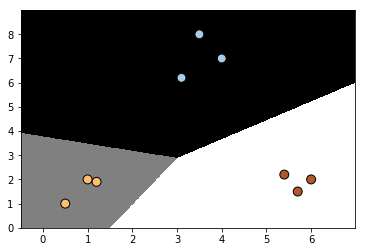

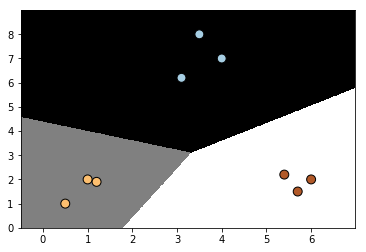

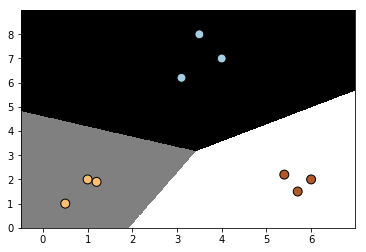

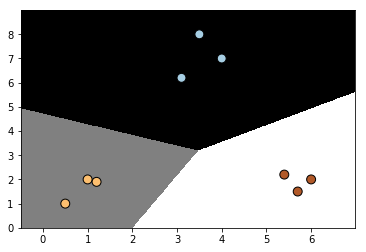

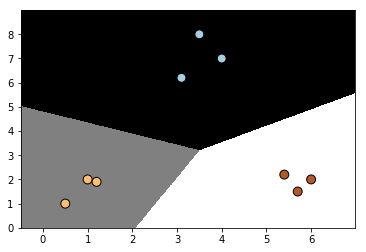

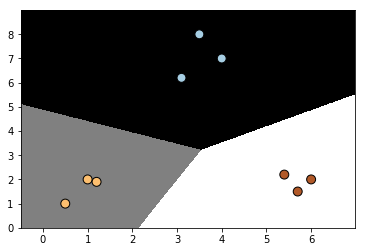

In [6]:
# 优化模型中的参数C
for c in [1,5,20,50,100,200,500]:
    classifier = LogisticRegression(C=c,random_state=37)
    classifier.fit(X, y)
    plot_classifier(classifier, X, y)
# 貌似C越多，分类的效果越好。